In [ ]:
There are many attributes of jobs. We can classify jobs according to different directions, 
and the degree of discrimination against sex is different in different classification situations.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
url = "GENDER_EMP_14032020174802948.csv"
data = pd.read_csv(url)
data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP5,"Share of employed in part-time employment, by ...",MEN,Men,TOTAL,Total,2005,2005,PC,Percentage,0,Units,NaN,NaN,12.0,NaN,NaN
1,AUS,Australia,EMP5,"Share of employed in part-time employment, by ...",MEN,Men,TOTAL,Total,2010,2010,PC,Percentage,0,Units,NaN,NaN,13.5,NaN,NaN
2,AUS,Australia,EMP5,"Share of employed in part-time employment, by ...",WOMEN,Women,TOTAL,Total,2005,2005,PC,Percentage,0,Units,NaN,NaN,38.7,NaN,NaN
3,AUS,Australia,EMP5,"Share of employed in part-time employment, by ...",WOMEN,Women,TOTAL,Total,2010,2010,PC,Percentage,0,Units,NaN,NaN,38.6,NaN,NaN
4,AUT,Austria,EMP5,"Share of employed in part-time employment, by ...",MEN,Men,TOTAL,Total,1995,1995,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [11]:
data.shape

(2698, 19)

In [12]:
data = data[["COU","Country","Sex","Time","Value"]]
data.head()

,COU,Country,Sex,Time,Value
0,AUS,Australia,Men,2005,12.0
1,AUS,Australia,Men,2010,13.5
2,AUS,Australia,Women,2005,38.7
3,AUS,Australia,Women,2010,38.6
4,AUT,Austria,Men,1995,3.1


In [48]:
uk_data = data.loc[data['COU'] == 'GBR']
uk_data.head()

,COU,Country,Sex,Time,Value
250,GBR,United Kingdom,Men,1990,5.3
251,GBR,United Kingdom,Men,1995,7.4
252,GBR,United Kingdom,Men,2000,8.5
253,GBR,United Kingdom,Men,2005,9.5
254,GBR,United Kingdom,Men,2010,11.6


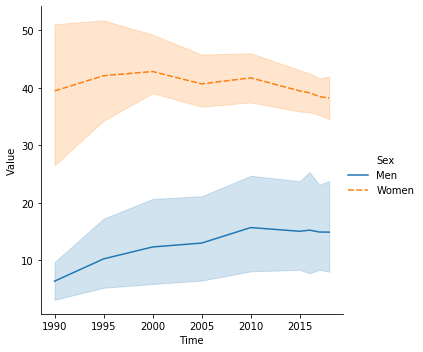

In [14]:
sns.relplot(x="Time", y="Value",
            hue="Sex", style="Sex",
            kind="line", data=uk_data);

In [15]:
new_uk_data = pd.pivot_table(uk_data, index=['Time'],
                        columns=['Sex'],values=['Value'])

In [16]:
new_uk_data.columns =[s2 for (s1,s2) in new_uk_data.columns.tolist()]

new_uk_data.head()

,Men,Women
Time,,
1990,6.350,39.450
1995,10.225,42.100
2000,12.300,42.825
2005,12.975,40.675
2010,15.675,41.725


In [17]:
new_uk_data['Gap'] = new_uk_data['Women'] - new_uk_data['Men']
new_uk_data.head()

,Men,Women,Gap
Time,,,
1990,6.350,39.450,33.100
1995,10.225,42.100,31.875
2000,12.300,42.825,30.525
2005,12.975,40.675,27.700
2010,15.675,41.725,26.050


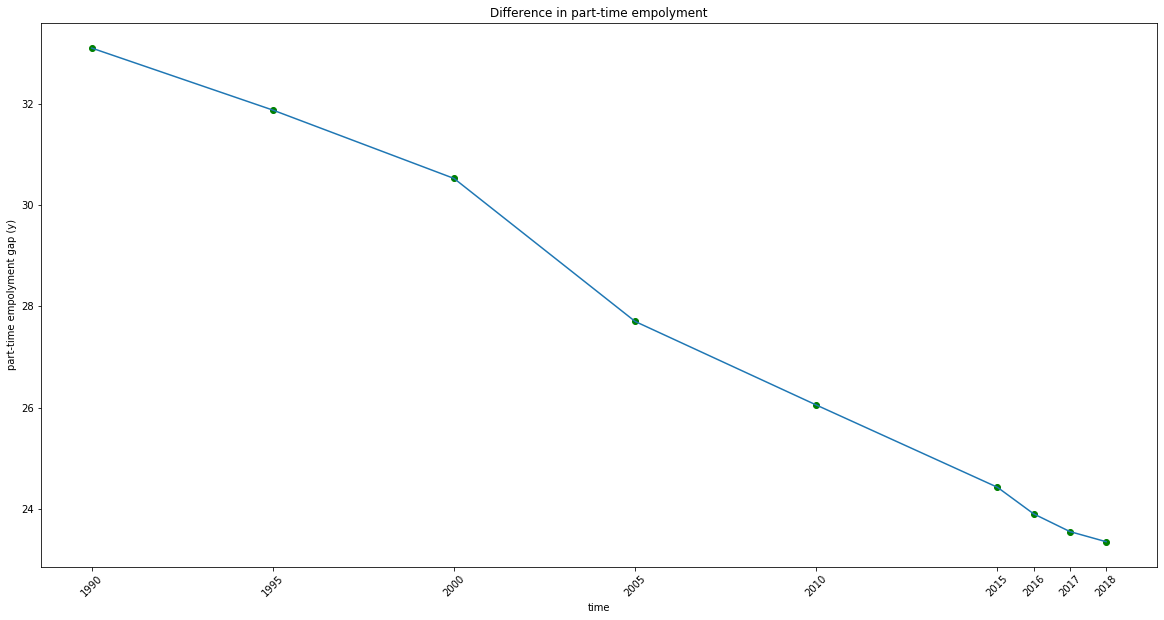

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(new_uk_data.index,new_uk_data['Gap'],c='green')
ax.plot(new_uk_data.index,new_uk_data['Gap'])
ax.set(xlabel='time', ylabel='part-time empolyment gap (y)',
       title='Difference in part-time empolyment')
plt.xticks(new_uk_data.index, rotation='45')

plt.show()

In [ ]:
From the analysis data I am looking for, the proportion of female part-time workers is far more than that of men.
I also find that the gap between men and women in part-time employment is decreasing year by year.

In [ ]:
I also explore the Full-time equivalent employment rate, by sex.

In [47]:
url2 = "GENDER_EMP_15032020172445068.csv"
pg_data = pd.read_csv(url2)
pg_data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,PRT,Portugal,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2011,2011,PC,Percentage,0,Units,NaN,NaN,56.6,NaN,NaN
1,ITA,Italy,EMP7,"Full-time equivalent employment rate, by sex",WOMEN,Women,1564,15-64,2005,2005,PC,Percentage,0,Units,NaN,NaN,38.8,NaN,NaN
2,GBR,United Kingdom,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2007,2007,PC,Percentage,0,Units,NaN,NaN,82.2,NaN,NaN
3,NOR,Norway,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,1995,1995,PC,Percentage,0,Units,NaN,NaN,0.0,NaN,NaN
4,FIN,Finland,EMP7,"Full-time equivalent employment rate, by sex",MEN,Men,1564,15-64,2012,2012,PC,Percentage,0,Units,NaN,NaN,69.4,NaN,NaN


In [42]:
pg_data = pg_data[["COU","Country","Sex","Time","Value"]]
pg_data.head()

,COU,Country,Sex,Time,Value
0,PRT,Portugal,Women,2011,56.6
1,ITA,Italy,Women,2005,38.8
2,GBR,United Kingdom,Men,2007,82.2
3,NOR,Norway,Men,1995,0.0
4,FIN,Finland,Men,2012,69.4


In [52]:
uk_data2 = pg_data.loc[data['COU'] == 'GBR']

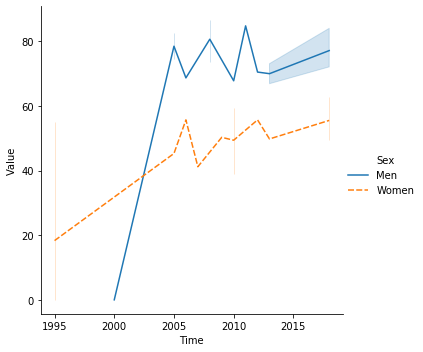

In [53]:
sns.relplot(x="Time", y="Value",
            hue="Sex", style="Sex",
            kind="line", data=uk_data2);

In [ ]:
This seems to have no regularity. So this dataset is not useful to us.